## Chemical Property Exploration for Numerical Records in `B3DB`

We have 1058 molecules with $\log{BB}$ values and this notebook explores the distributions of some molecular properties following Lipinski's rule of five [Lipinski CA, et al, Adv. Drug Deliv. Rev. 46 (1-3): 3-26. ](https://doi.org/10.1016%2FS0169-409X%2800%2900129-0), which includes molecular weight, hydrogen bond donors and acceptors, rotatable bonds (not covered in this notebook) and octanol-water partition coefficient $\log{P}$. All these properties are computed with `RDKit`. The distribution of $\log{BB}$ is also examed.

In [1]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
%matplotlib notebook
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 14})

In [3]:
# data file name for BBB dataset with logBB values
bbb_reg_fpath = "../B3DB/B3DB_regression.tsv"
# load data
df_regression = pd.read_csv(bbb_reg_fpath, sep="\t")

In [4]:
df_regression.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,smiles_result,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](OC2O[C@H]...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,Cc1ccc(CC2CNC(NCCCCc3ncc(Br)cc3C)NC2=O)cn1,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,A,NaN
4,5,NaN,NaN,CN1Cc2c(-c3noc(C(C)(O)O)n3)ncn2-c2cccc(Cl)c2C1=O,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,A,NaN


In [5]:
df_regression.describe()

,NO.,logBB
count,1058.000000,1058.000000
mean,529.500000,-0.077873
std,305.562596,0.751623
min,1.000000,-2.690000
25%,265.250000,-0.535000
50%,529.500000,-0.020000
75%,793.750000,0.420000
max,1058.000000,1.700000


In [6]:
# compute number of H bond donors, acceptors, molecular weight for molecules in B3DB
for idx, row in df_regression.iterrows():
    mol = Chem.MolFromSmiles(row["SMILES"])
    if mol is not None:
        mol = Chem.AddHs(mol)
        df_regression.loc[idx, "H_donor"] = Chem.Lipinski.NumHDonors(mol)
        df_regression.loc[idx, "H_acceptor"] = Chem.Lipinski.NumHAcceptors(mol)
        df_regression.loc[idx, "MW"] = Descriptors.MolWt(mol)
        df_regression.loc[idx, "num_rot_bonds"] = Chem.Lipinski.NumRotatableBonds(mol)

In [7]:
df_regression.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,smiles_result,group,comments,H_donor,H_acceptor,MW,num_rot_bonds
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,A,NaN,4.0,14.0,520.480,12.0
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,A,NaN,5.0,10.0,461.467,8.0
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](OC2O[C@H]...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,A,NaN,5.0,10.0,461.467,8.0
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,Cc1ccc(CC2CNC(NCCCCc3ncc(Br)cc3C)NC2=O)cn1,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,A,NaN,3.0,5.0,446.393,10.0
4,5,NaN,NaN,CN1Cc2c(-c3noc(C(C)(O)O)n3)ncn2-c2cccc(Cl)c2C1=O,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,A,NaN,2.0,8.0,375.772,6.0


In [8]:
# filter out molecules with MW > 900
df_regression = df_regression[df_regression["MW"] <= 900]

# filter out molecules with logBB values <= -9
big_molecules_smiles = df_regression[df_regression["logBB"] < -9]
big_molecules_smiles = big_molecules_smiles["SMILES"].to_list()

df_regression = df_regression[df_regression["logBB"] >= -9]

In [9]:
df_regression.shape

(1051, 15)

<IPython.core.display.Javascript object>


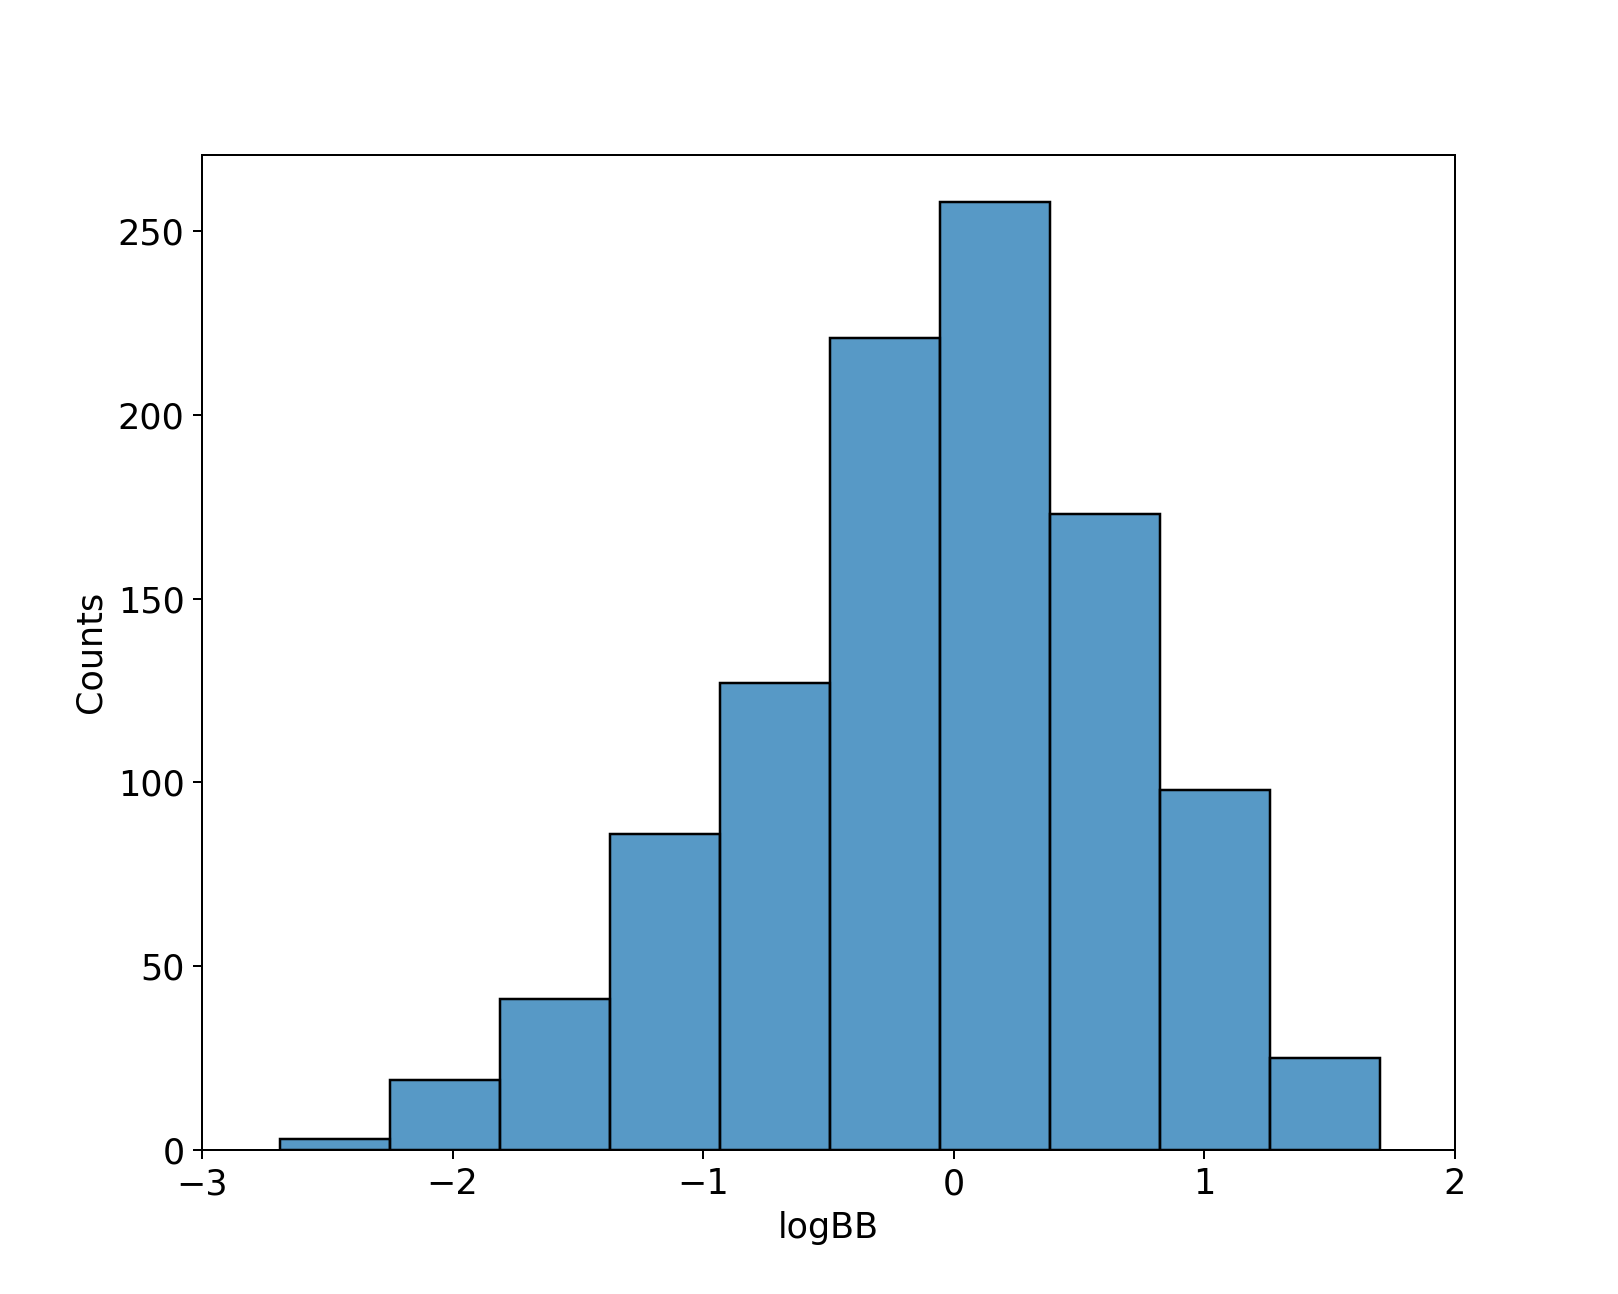

(-3.0, 2.0)

In [10]:
# plot histogram for logBB
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_label_position("left")
sns.histplot(df_regression, x="logBB", bins=10)
plt.xlabel("logBB",
           fontdict={"fontsize": 14})
plt.ylabel("Counts",
           fontdict={"fontsize": 14})
plt.xlim(-3, 2)
# plt.savefig("logBB_histogram.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


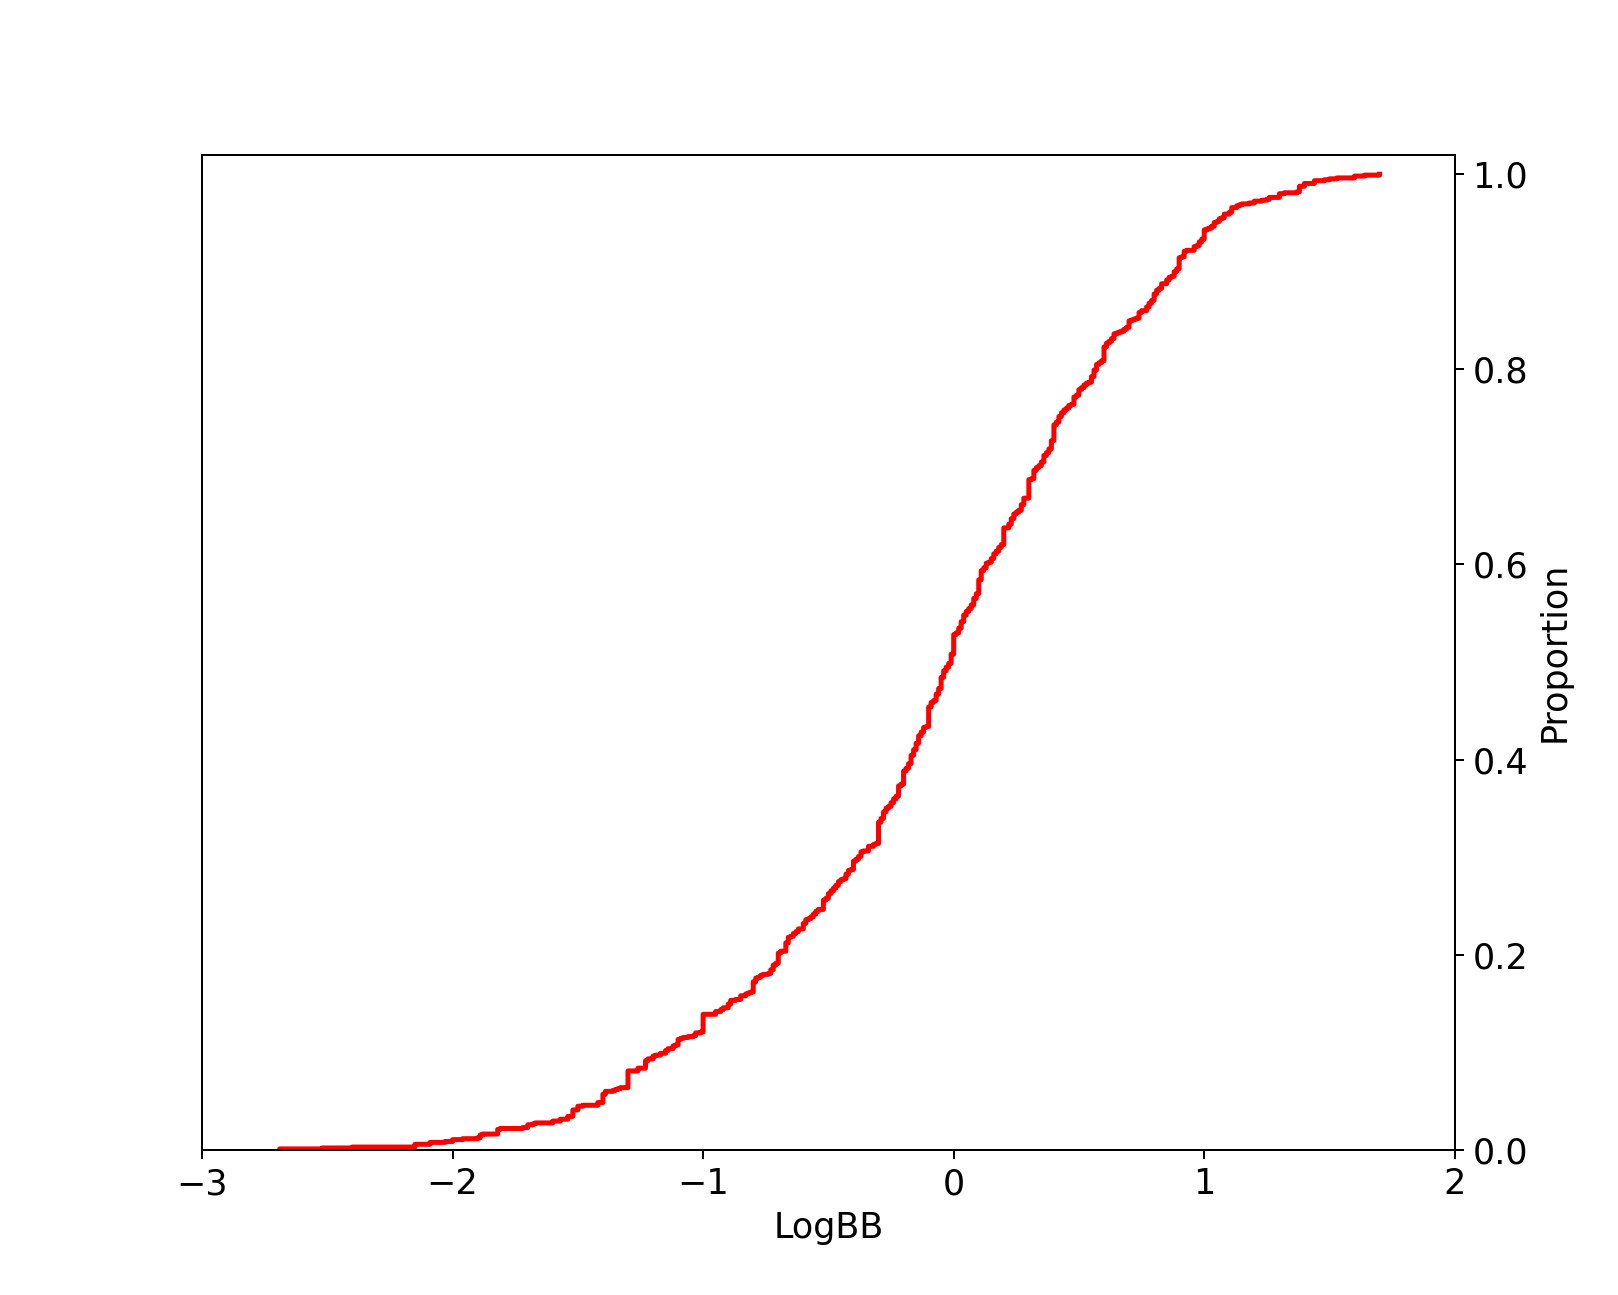

(0.0, 1.02)

In [11]:
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
sns.ecdfplot(data=df_regression, x="logBB", c="r", linewidth=2)
plt.xlabel("LogBB",
           fontdict={"fontsize": 14})
plt.ylabel("Proportion",
           fontdict={"fontsize": 14})

plt.xlim(-3, 2)
plt.ylim(0, 1.02)
# plt.savefig("logBB_ecdf.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


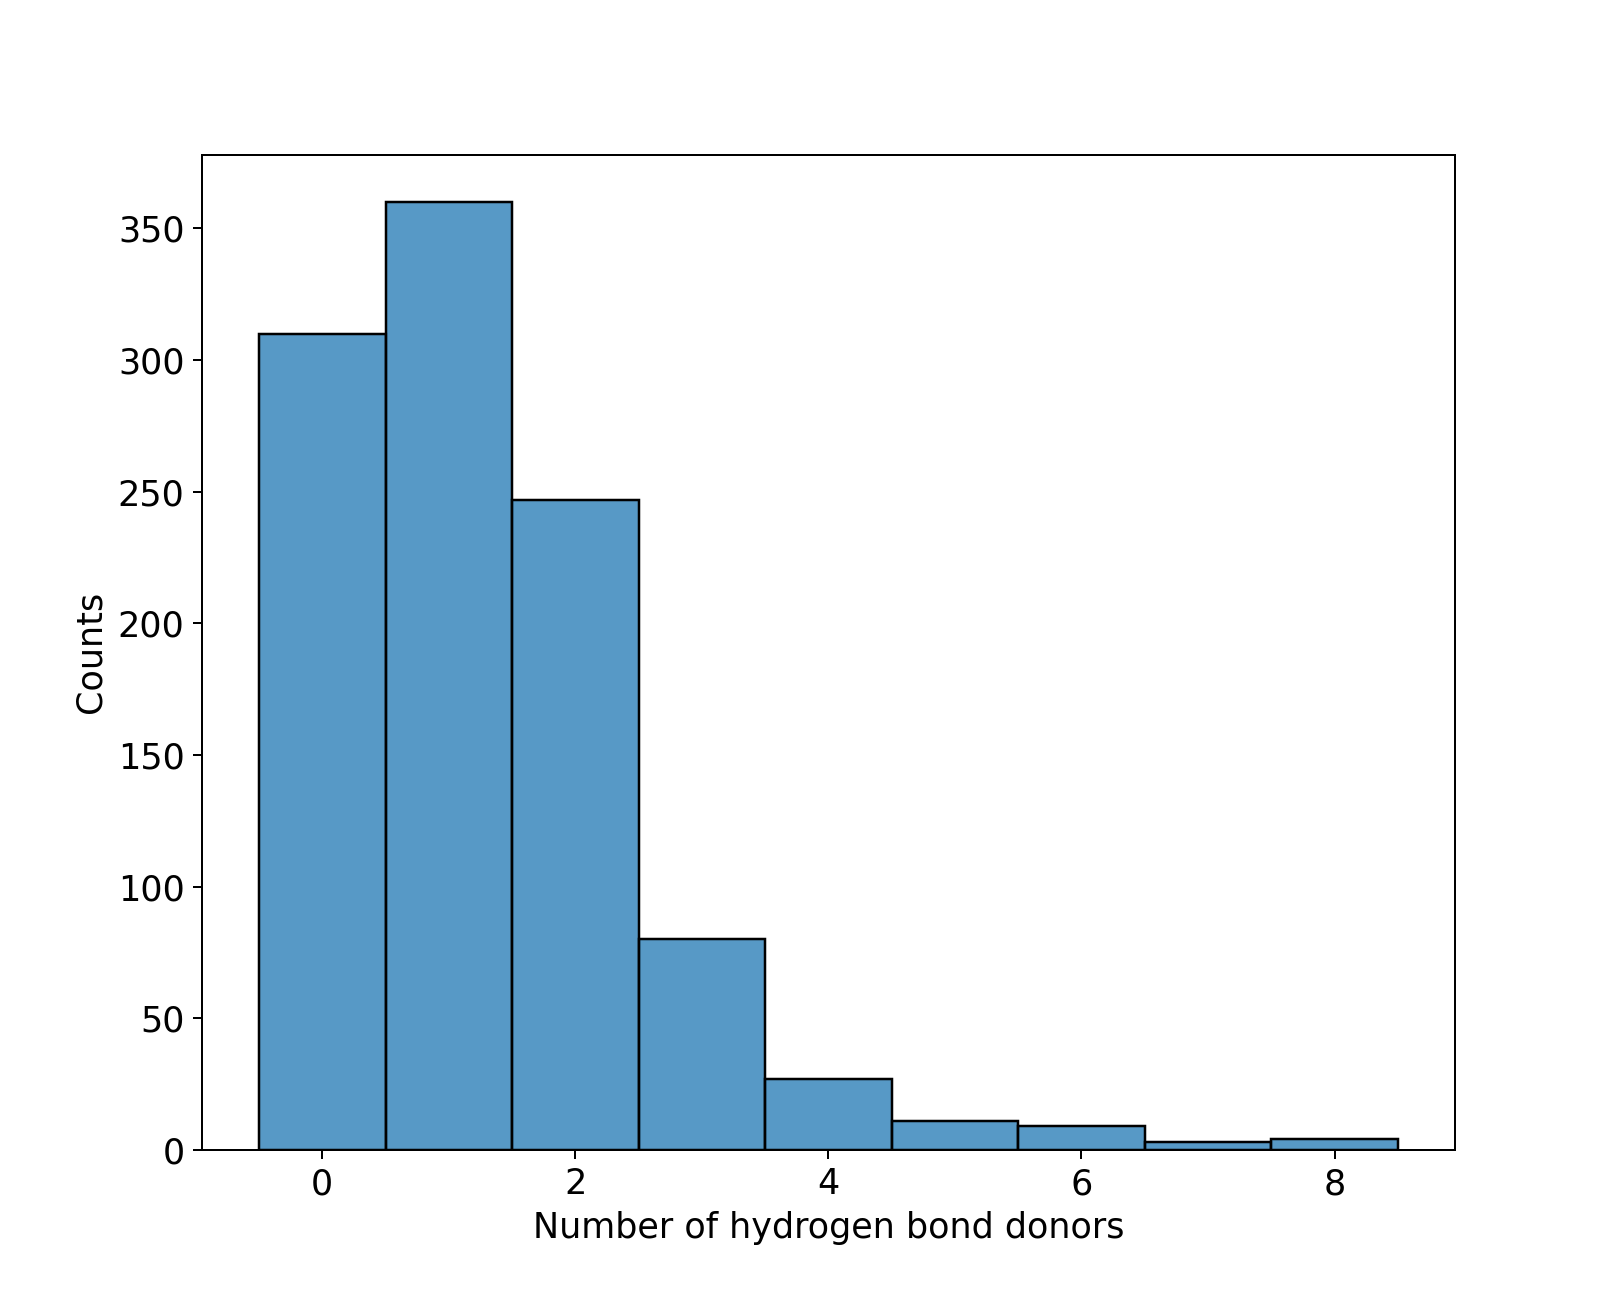

Text(0, 0.5, 'Counts')

In [12]:
# plot H donor, histogram
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_label_position("left")
sns.histplot(df_regression, x="H_donor",
             bins=int(df_regression["H_donor"].max() - df_regression["H_donor"].min()),
             discrete=True)

plt.xlabel("Number of hydrogen bond donors",
           fontdict={"fontsize": 14})
plt.ylabel("Counts",
           fontdict={"fontsize": 14})
# plt.savefig("H_donors_histogram.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


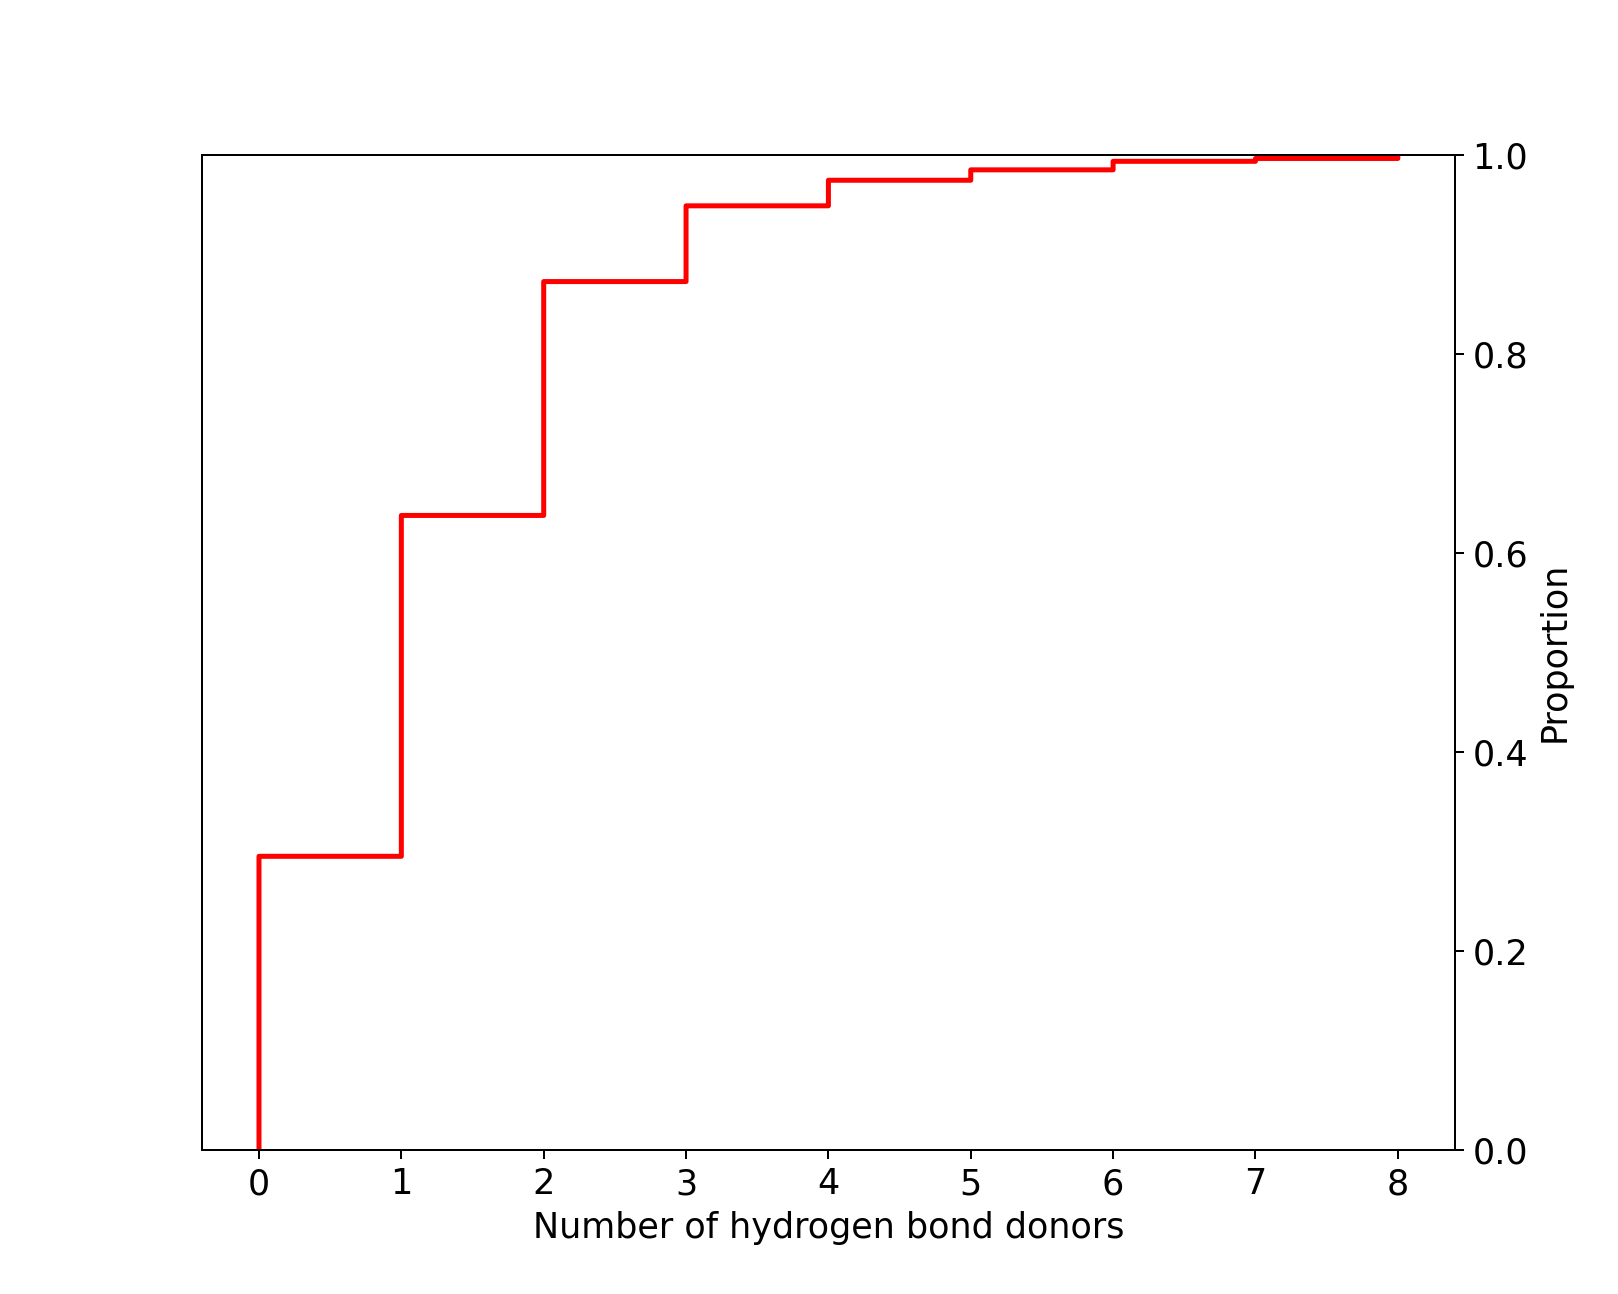

Text(0, 0.5, 'Proportion')

In [13]:
# plot H donor, cumulative distribution
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
sns.ecdfplot(data=df_regression, x="H_donor", c="r", linewidth=2)

plt.xlabel("Number of hydrogen bond donors",
           fontdict={"fontsize": 14})
plt.ylabel("Proportion",
           fontdict={"fontsize": 14})
# plt.savefig("H_donors_ecdf.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


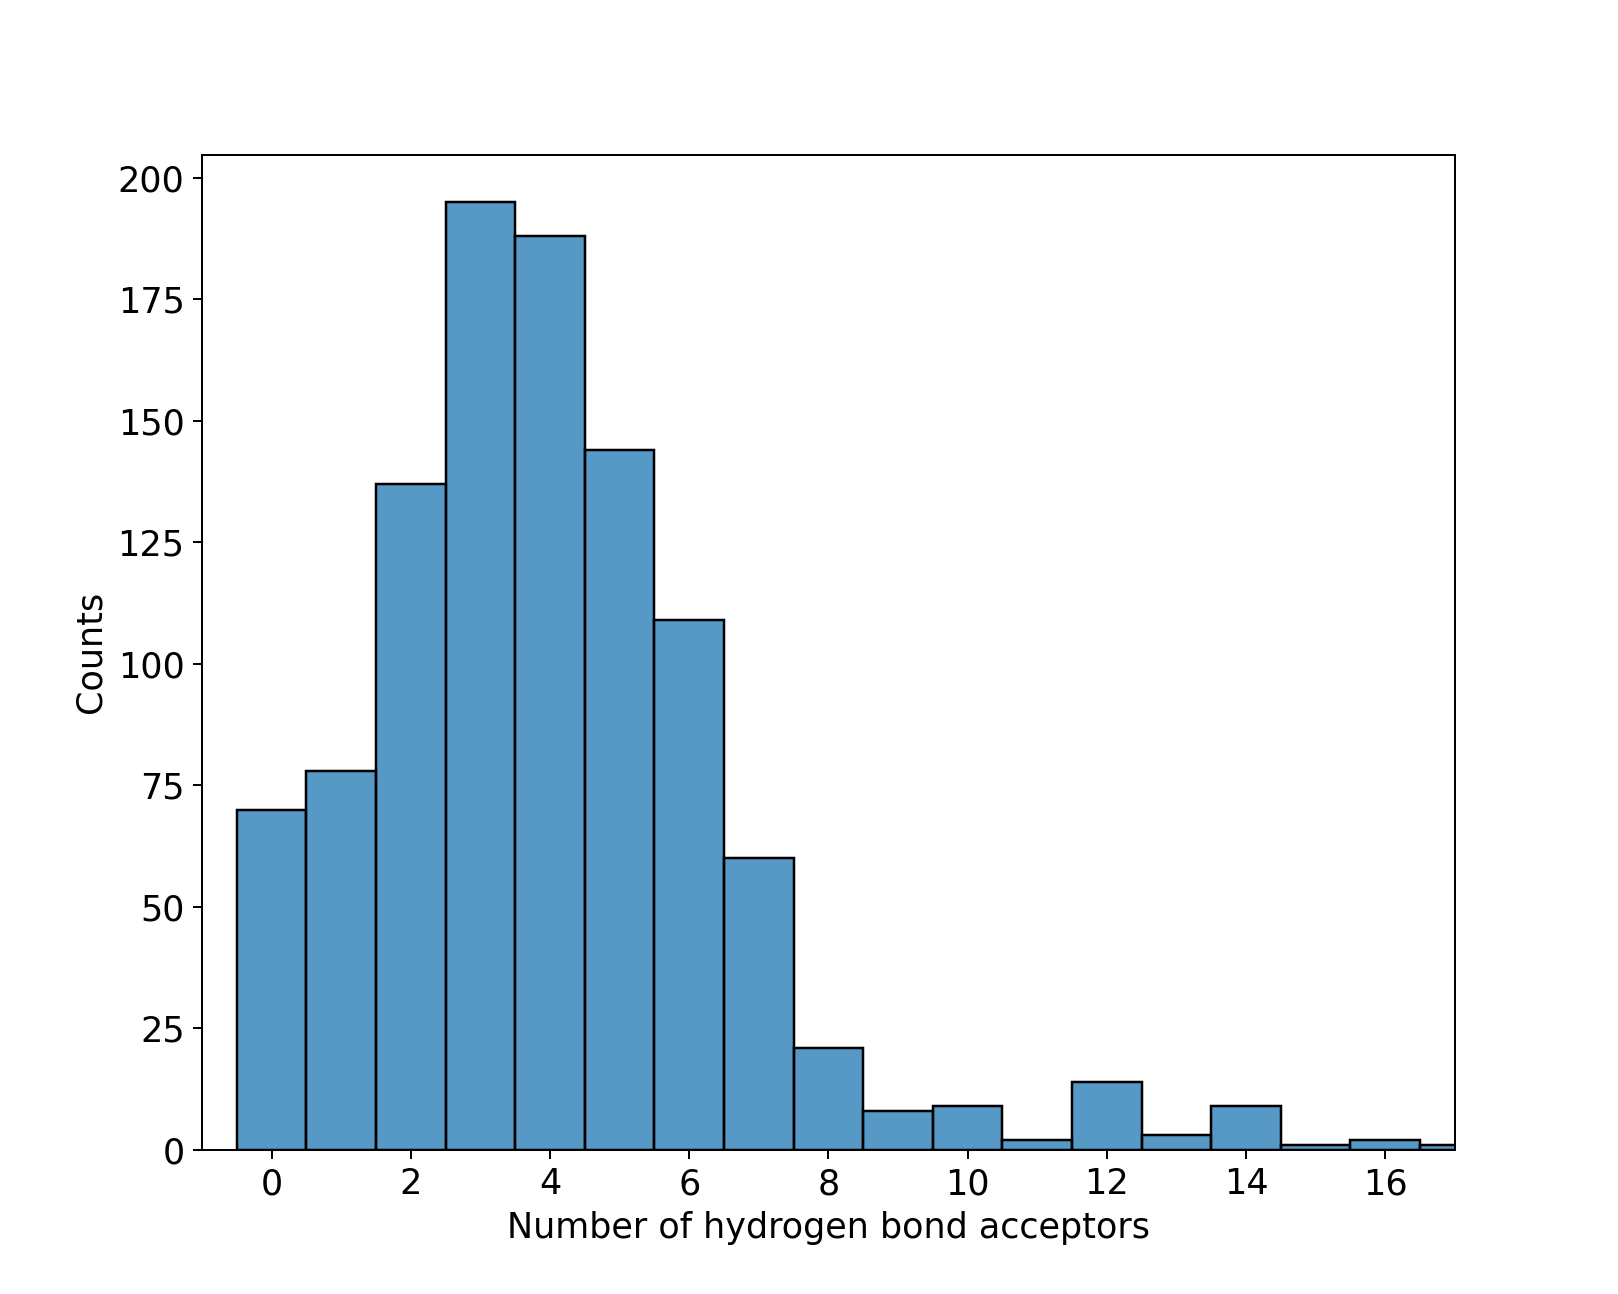

(-1.0, 17.0)

In [14]:
# plot H acceptor, histogram
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_label_position("left")
sns.histplot(df_regression, x="H_acceptor",
             bins=int(df_regression["H_acceptor"].max() - df_regression["H_acceptor"].min()),
             discrete=True)

plt.xlabel("Number of hydrogen bond acceptors",
           fontdict={"fontsize": 14})
plt.ylabel("Counts",
           fontdict={"fontsize": 14})
plt.xlim(-1, 17)
# plt.savefig("H_acceptors_histogram.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


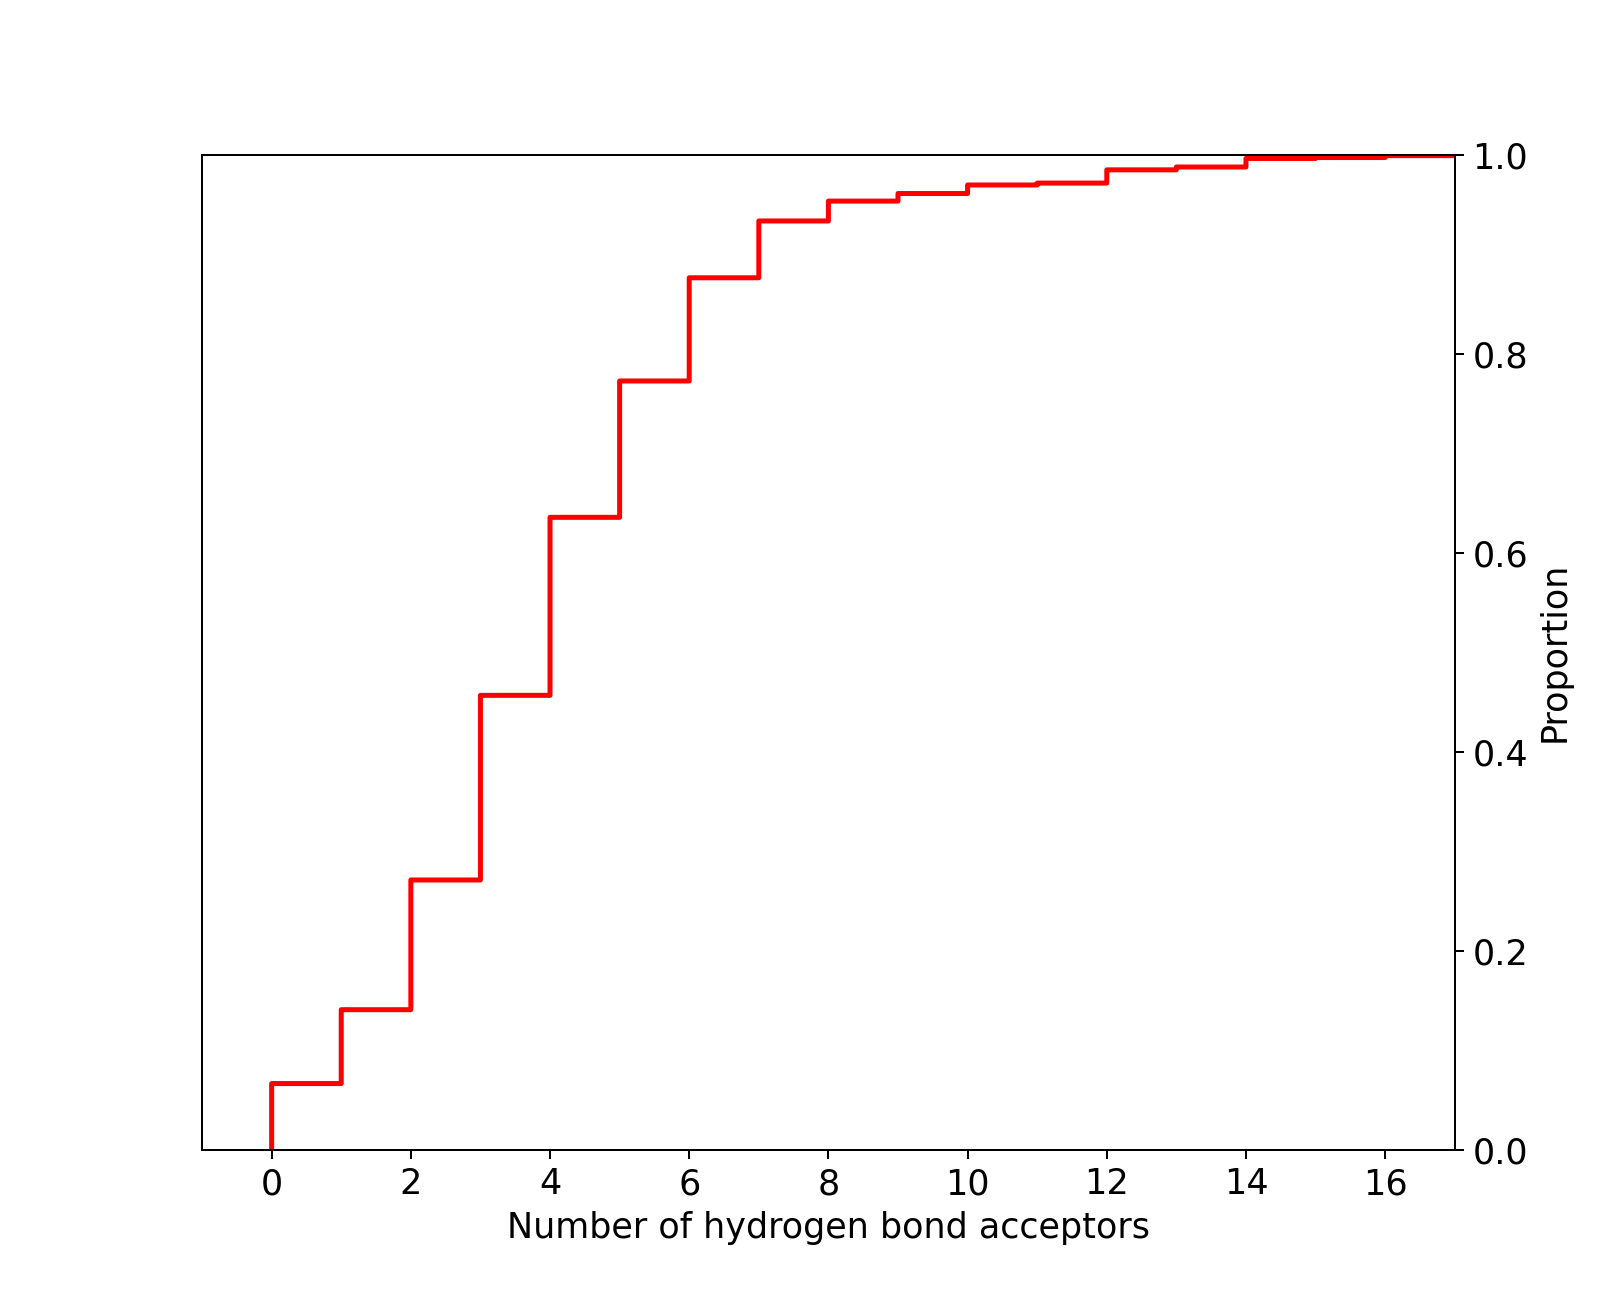

(-1.0, 17.0)

In [15]:
# plot H acceptor, cumulative distribution
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
sns.ecdfplot(data=df_regression, x="H_acceptor", c="r", linewidth=2)
plt.xlabel("Number of hydrogen bond acceptors",
           fontdict={"fontsize": 14})
plt.ylabel("Proportion",
           fontdict={"fontsize": 14})
plt.xlim(-1, 17)
# plt.savefig("H_acceptors_ecdf.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


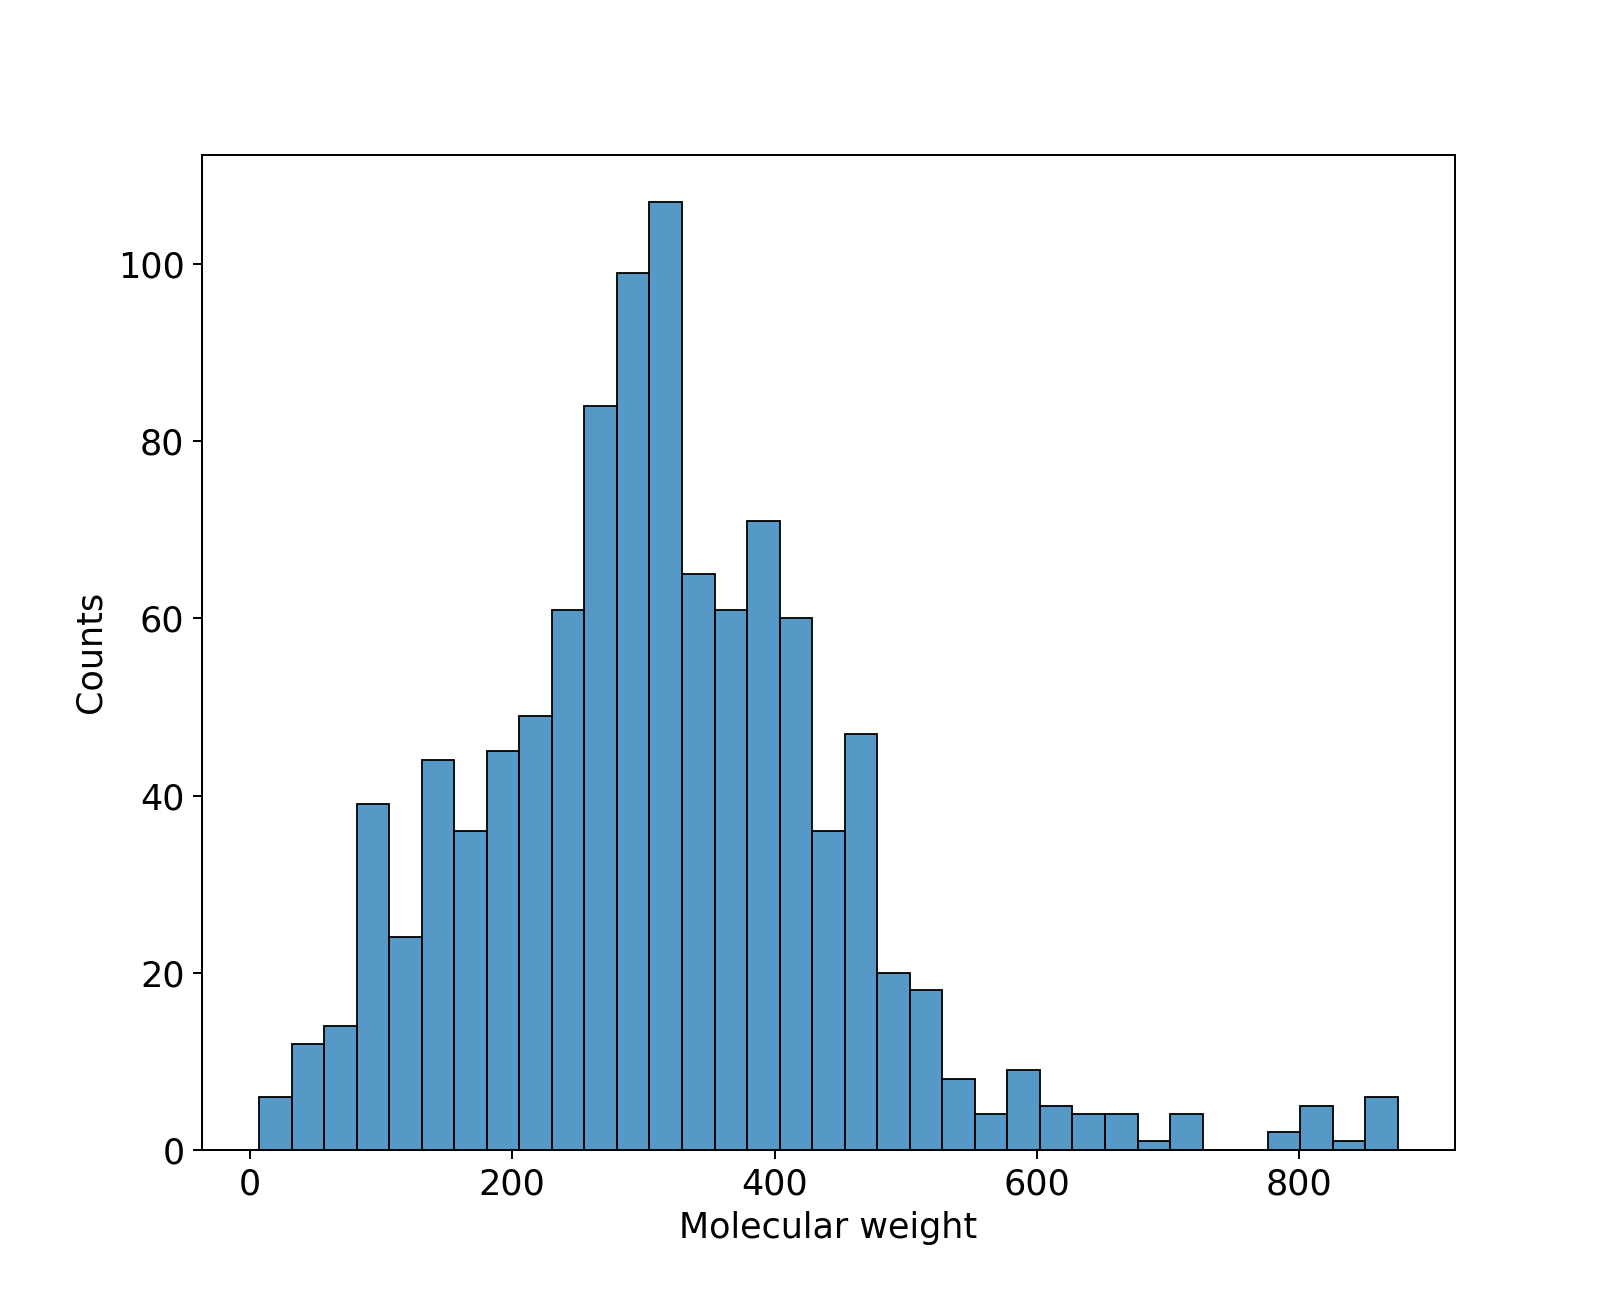

Text(0, 0.5, 'Counts')

In [16]:
# plot molecular weight, histogram
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_label_position("left")
sns.histplot(df_regression, x="MW", bins=35)

plt.xlabel("Molecular weight",
           fontdict={"fontsize": 14})
plt.ylabel("Counts",
           fontdict={"fontsize": 14})
# plt.savefig("MW_histogram.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


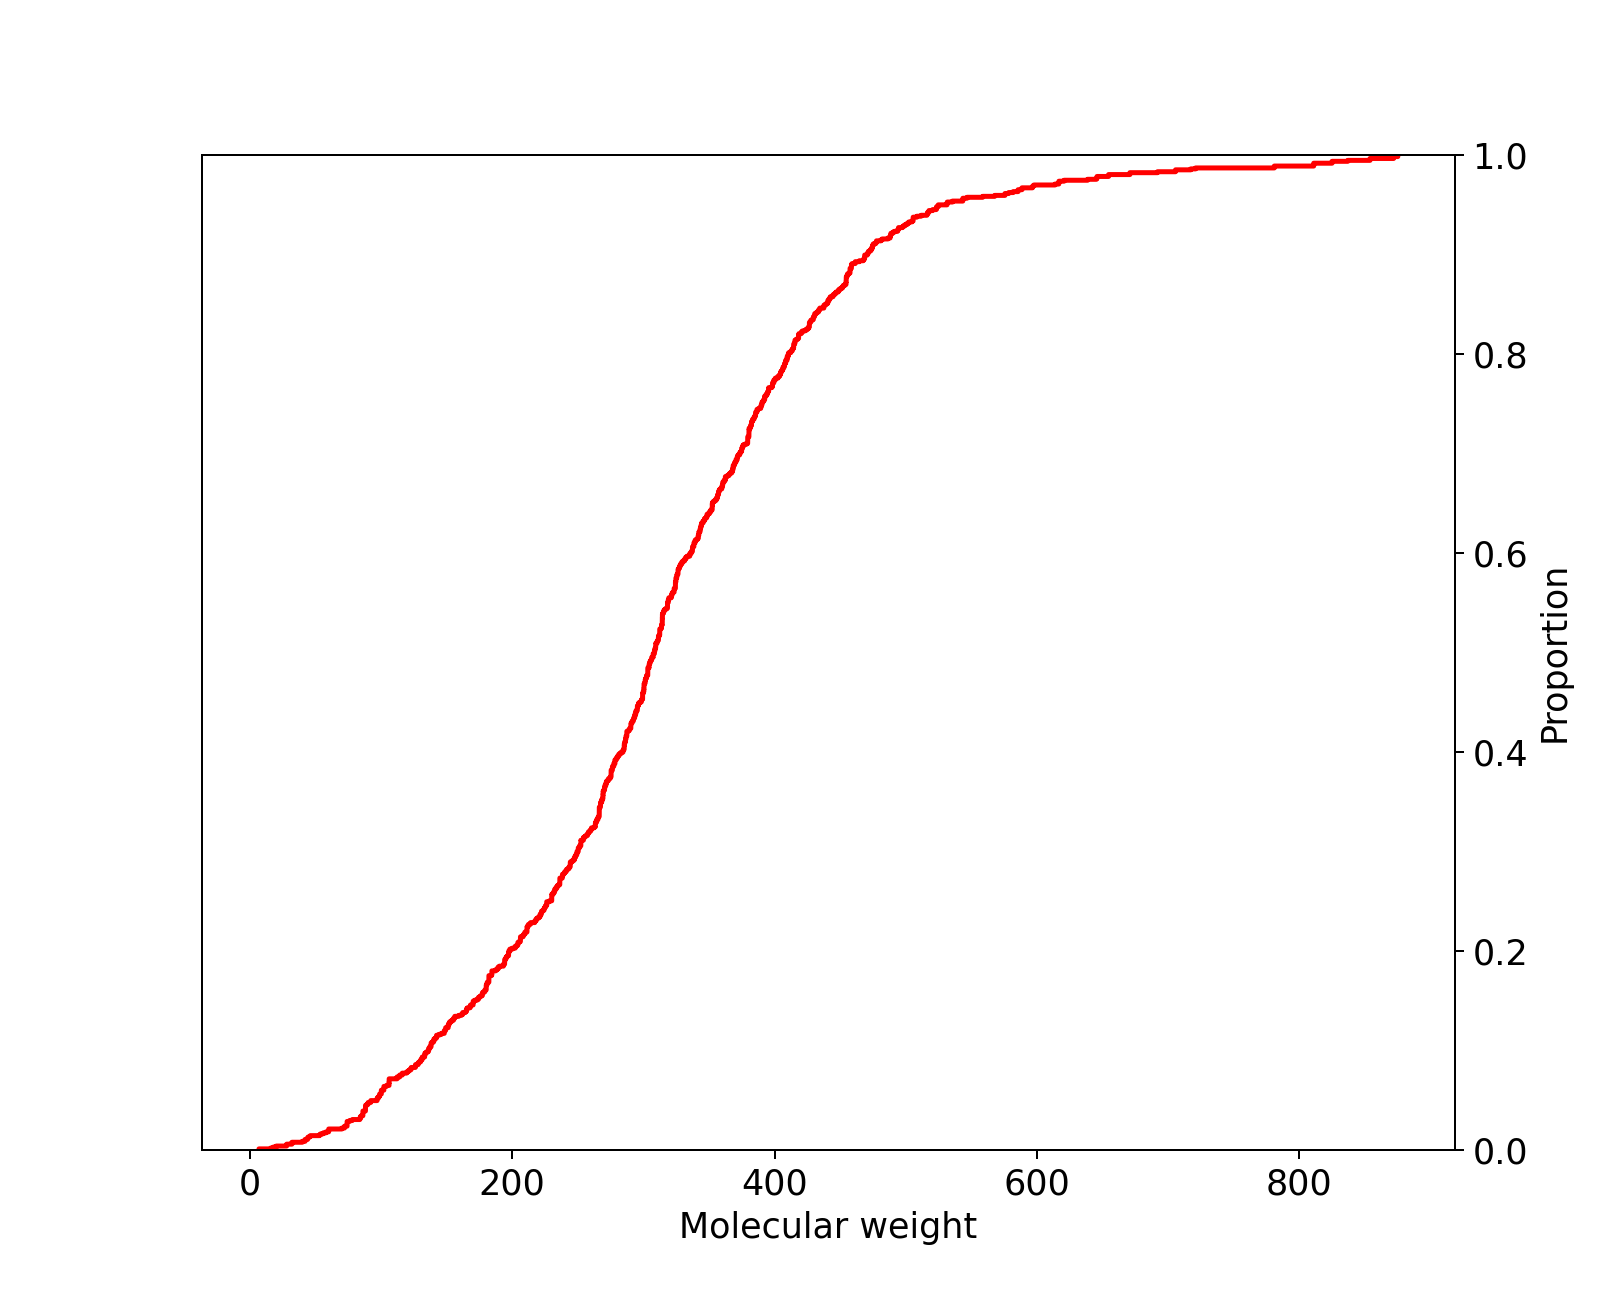

Text(0, 0.5, 'Proportion')

In [17]:
# plot molecular weight, cumulative distribution
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
sns.ecdfplot(data=df_regression, x="MW", c="r", linewidth=2)
plt.xlabel("Molecular weight",
           fontdict={"fontsize": 14})
plt.ylabel("Proportion",
           fontdict={"fontsize": 14})
# plt.savefig("MW_ecdf.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


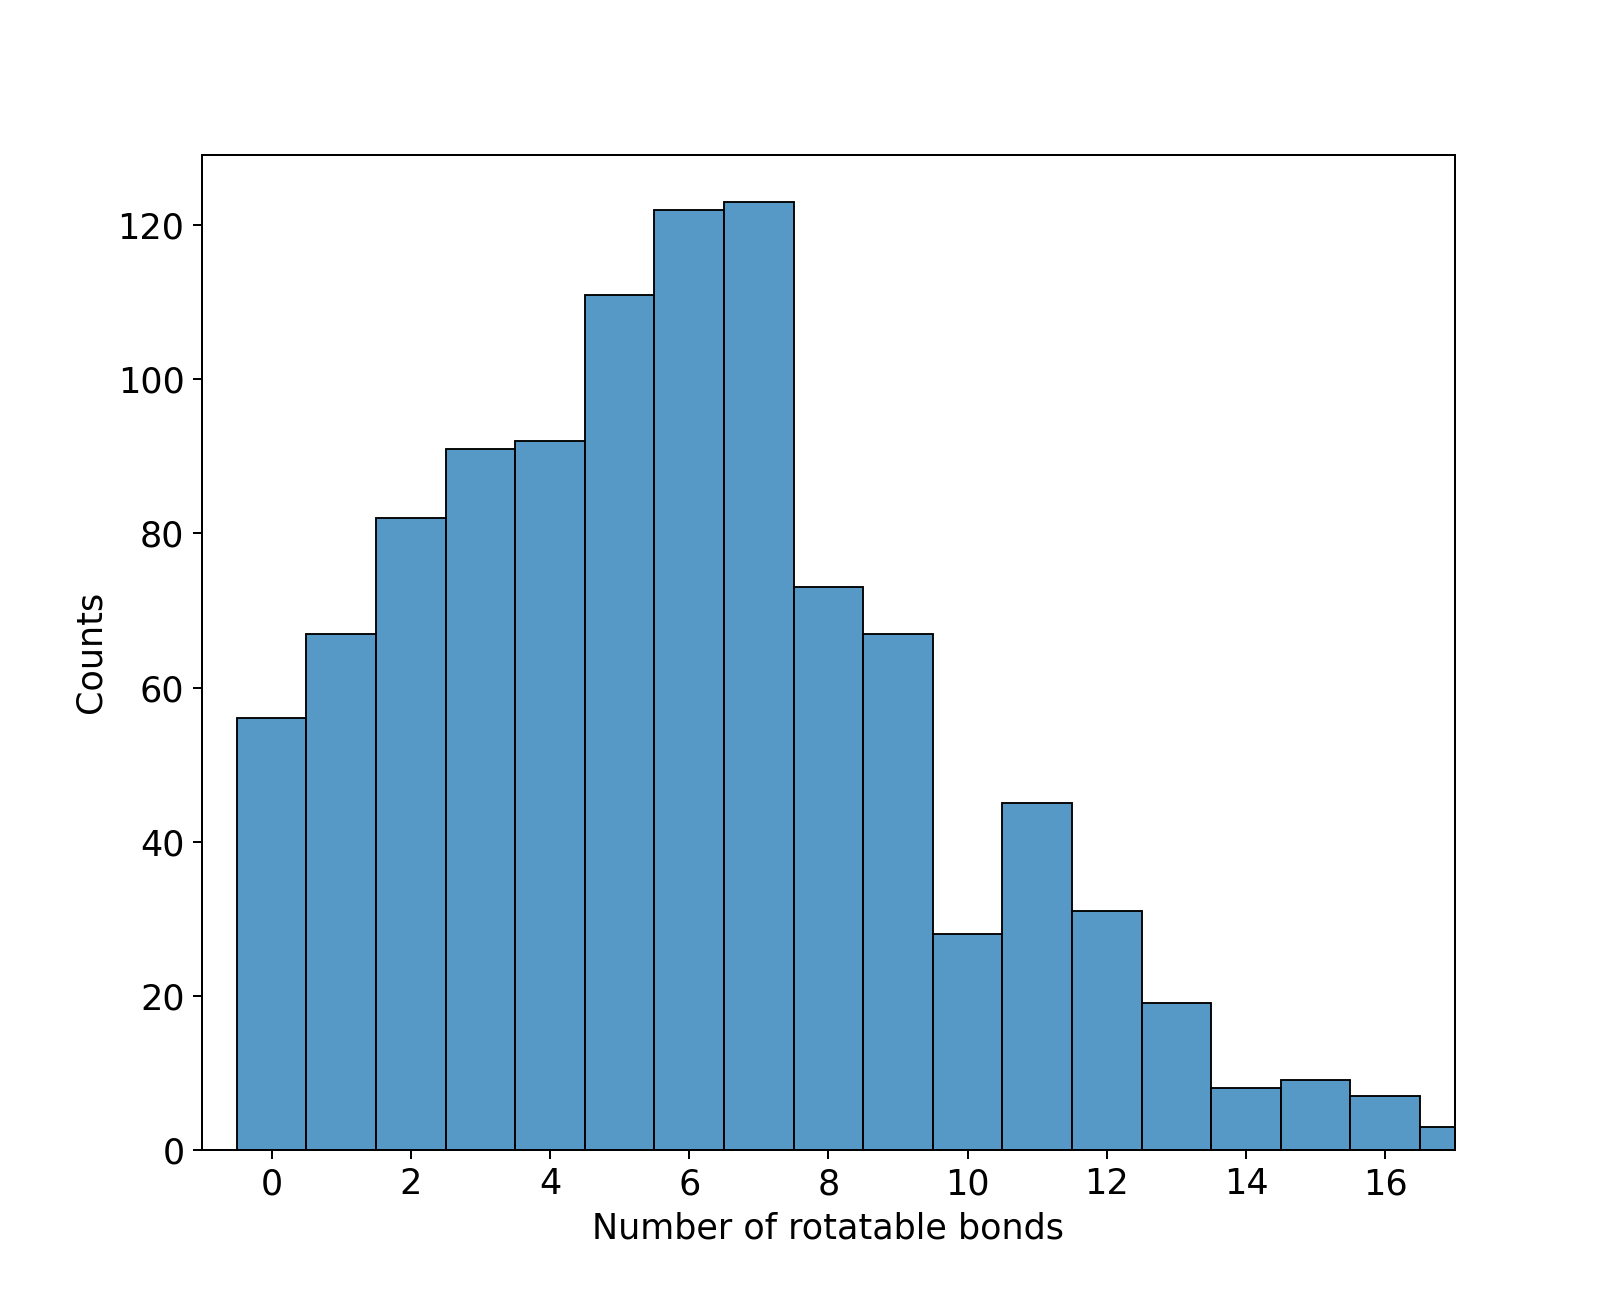

(-1.0, 17.0)

In [18]:
# plot number of rotatable bonds, histogram
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_label_position("left")
sns.histplot(df_regression, x="num_rot_bonds",
             bins=int(df_regression["num_rot_bonds"].max() - df_regression["num_rot_bonds"].min()),
             discrete=True)

plt.xlabel("Number of rotatable bonds",
           fontdict={"fontsize": 14})
plt.ylabel("Counts",
           fontdict={"fontsize": 14})
plt.xlim(-1, 17)
# plt.savefig("number_rotatable_bonds_histogram.png", dpi=300, transparent=True)

<IPython.core.display.Javascript object>


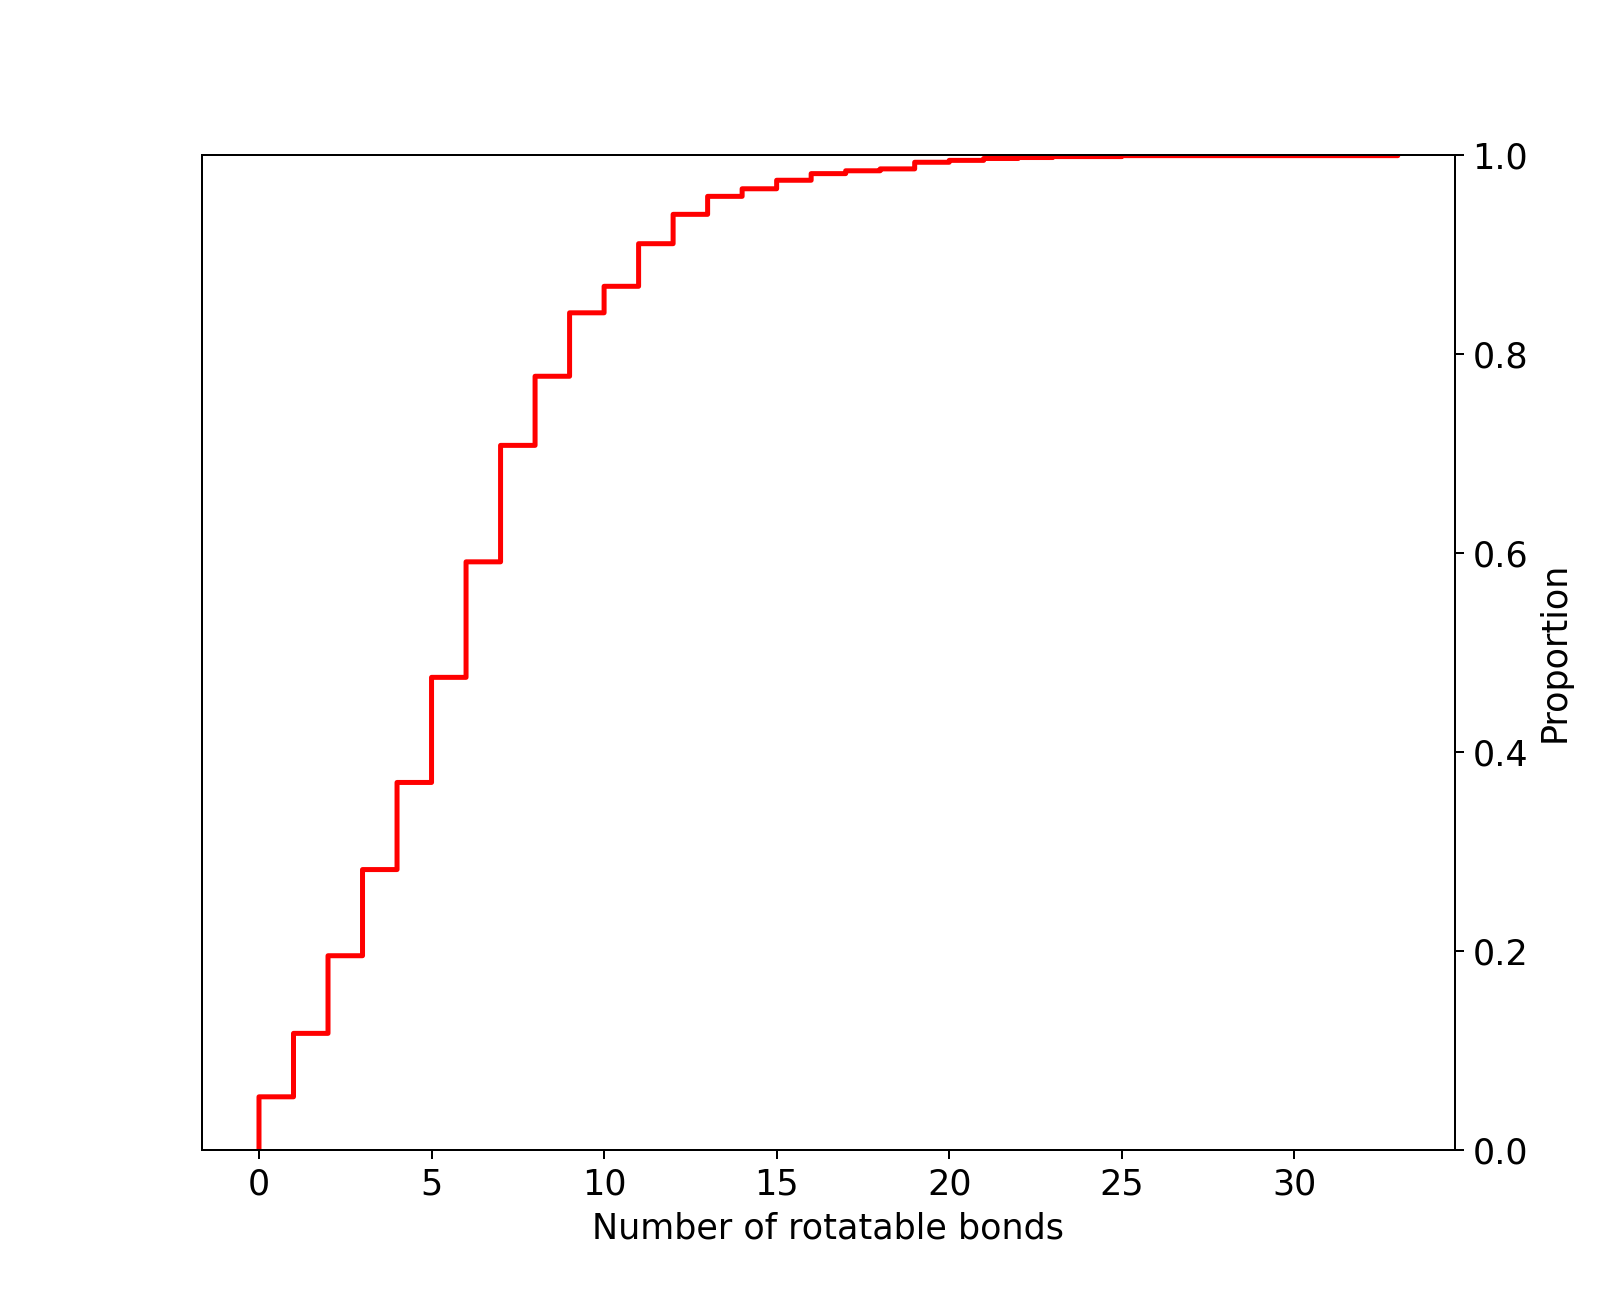

Text(0, 0.5, 'Proportion')

In [19]:
# plot number of rotatable bonds, cumulative distribution
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
sns.ecdfplot(data=df_regression, x="num_rot_bonds", c="r", linewidth=2)
plt.xlabel("Number of rotatable bonds",
           fontdict={"fontsize": 14})
plt.ylabel("Proportion",
           fontdict={"fontsize": 14})
# plt.savefig("num_rot_bonds_ecdf.png", dpi=300, transparent=True)